# Import train dataset

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

mpl.rcParams['figure.figsize'] = (13, 13)

dataset = pd.read_csv('dota2Train.csv', header=None)
dataset = dataset.iloc[:200, :]

In [49]:
dados = dataset.iloc[:200, 1:]

In [50]:
from sklearn.manifold import TSNE
mpl.rcParams['figure.figsize'] = (10, 10)
tsne = TSNE(n_components=2)
graf = tsne.fit_transform(dados)

In [51]:
for xis in range(len(graf)):
    if dataset.iloc[:, 0][xis] == 1:
        plt.scatter(graf[xis][0], graf[xis][1], c='red')
    else:
        plt.scatter(graf[xis][0], graf[xis][1], c='blue')

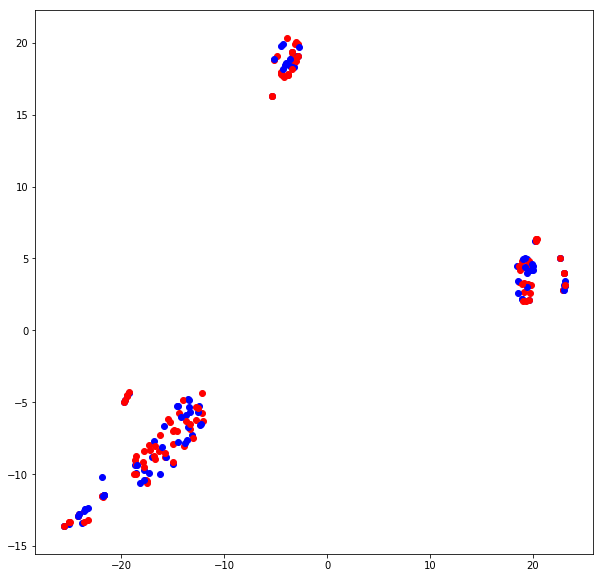

In [52]:
plt.show()

# Correlation Matrix

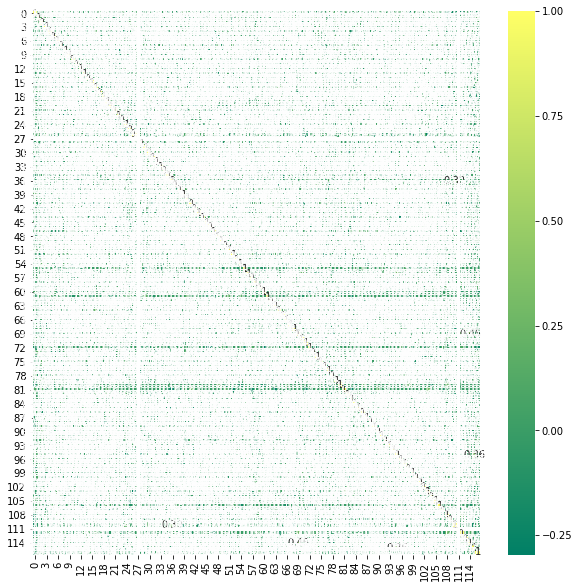

In [53]:
import seaborn as sns

def table_corr(df):
    sns.heatmap(df.corr(), annot=True, cmap='summer')
    plt.show()
    
table_corr(dataset)

# Get target and data features

Checking the correlation matrix, we can see that columns 1,2,3 doesnt affect our model in a good way.

In [2]:
X_train = dataset.iloc[0:, 1:]
y_train = dataset.iloc[:, 0]

# Import test dataset

In [3]:
test_dataset = pd.read_csv('dota2Test.csv', header=None)
X_test = test_dataset.iloc[0:, 1:]
y_test = test_dataset.iloc[:, 0]

# KNN

## Calculate best number of neighbors

In [ ]:
n = np.arange(1,5)
train_accuracy = np.empty(len(n))
test_accuracy = np.empty(len(n))

for i, k in enumerate(n):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
        #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

In [ ]:
# Generate plot of overfitting and underfitting
plt.title('k-NN accuracy: Varying Number of Neighbors')
plt.plot(n, test_accuracy, label = 'Testing Accuracy')
plt.plot(n, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## Prediction

In [16]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)

pred = knn.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score

acc_knn = accuracy_score(y_test, pred)
print(acc_knn)

0.562657858947


# Naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, pred)
print(acc)

# Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)

In [ ]:
acc_dt = accuracy_score(y_test, pred_dt)
print(acc_dt)

In [ ]:
cm = confusion_matrix(y_test, pred_dt)
print(cm)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [ ]:
acc_rfc = accuracy_score(y_test, pred_rfc)
print(acc_rfc)

# Multi-layer Perceptron classifier

In [ ]:
from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier(solver='lbfgs', alpha=1e-5)
mlpc.fit(X_train, y_train)

mlpc_pred = mlpc.predict(X_test)

In [ ]:
acc_mlpc = accuracy_score(y_test, mlpc_pred)
print(acc_mlpc)

# SVM

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='sigmoid')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

In [5]:
acc_svm = accuracy_score(y_test, svm_pred)
print(acc_svm)

0.496794249077


# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train, y_train)
lgp = lg.predict(X_test)

In [16]:
acc_lg = accuracy_score(y_test, lgp)
print(acc_lg)

0.597726831164
